In [1]:
import pandas as pd
import numpy as np
from nsepy import get_history
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf


In [2]:
df=get_history(symbol="SBIN",start=date(2015,10,10),end=date(2022,5,30))

In [3]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-10-12,SBIN,EQ,243.45,244.10,245.65,241.30,244.15,244.55,244.27,7566962,1.848345e+14,57702,2819307,0.3726
2015-10-13,SBIN,EQ,244.55,244.00,247.50,242.05,243.90,243.80,244.56,10200698,2.494712e+14,73013,4105359,0.4025
2015-10-14,SBIN,EQ,243.80,243.70,246.80,243.20,245.00,244.25,244.82,7895820,1.933056e+14,55278,3212893,0.4069
2015-10-15,SBIN,EQ,244.25,246.00,249.90,245.50,249.05,248.95,248.42,11582401,2.877244e+14,86325,3894772,0.3363
2015-10-16,SBIN,EQ,248.95,249.85,257.15,248.35,256.80,254.85,251.84,11738832,2.956325e+14,84407,3725598,0.3174


In [4]:
df["simple_return"]=(df["Close"]/df["Close"].shift(1))-1

In [5]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,simple_return
Date,,,,,,,,,,,,,,,
2015-10-12,SBIN,EQ,243.45,244.10,245.65,241.30,244.15,244.55,244.27,7566962,1.848345e+14,57702,2819307,0.3726,NaN
2015-10-13,SBIN,EQ,244.55,244.00,247.50,242.05,243.90,243.80,244.56,10200698,2.494712e+14,73013,4105359,0.4025,-0.003067
2015-10-14,SBIN,EQ,243.80,243.70,246.80,243.20,245.00,244.25,244.82,7895820,1.933056e+14,55278,3212893,0.4069,0.001846
2015-10-15,SBIN,EQ,244.25,246.00,249.90,245.50,249.05,248.95,248.42,11582401,2.877244e+14,86325,3894772,0.3363,0.019243
2015-10-16,SBIN,EQ,248.95,249.85,257.15,248.35,256.80,254.85,251.84,11738832,2.956325e+14,84407,3725598,0.3174,0.023700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,SBIN,EQ,460.90,462.40,466.80,460.20,463.00,462.05,463.29,17175179,7.957059e+14,139005,8555677,0.4981,0.002495
2022-05-25,SBIN,EQ,462.05,461.00,464.45,452.05,453.45,454.10,458.77,12728644,5.839499e+14,154093,4570376,0.3591,-0.017206
2022-05-26,SBIN,EQ,454.10,456.85,470.10,452.50,469.60,468.90,460.09,17055257,7.846912e+14,208123,6310397,0.3700,0.032592


<AxesSubplot:xlabel='Date'>

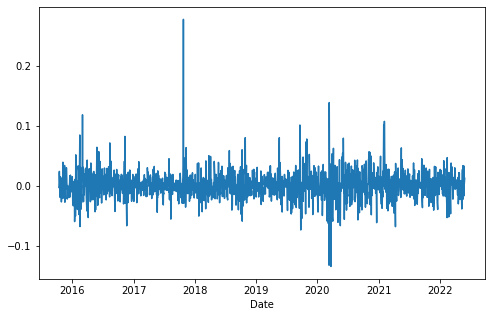

In [6]:
df["simple_return"].plot(figsize=(8,5))

<AxesSubplot:xlabel='Date'>

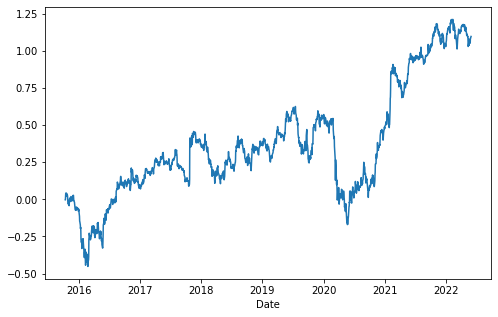

In [7]:
df["simple_return"].cumsum().plot(figsize=(8,5))

In [8]:
avg_return=df["simple_return"].mean()
avg_return*100  ## Daily return

0.06685270599395544

In [9]:
### Annual Returned by SBI since 2015 october and May 2022
avg_return_a=round(avg_return*250*100,3)
avg_return_a

16.713

In [10]:
## Calcculate the log return##
df["log_return"]=np.log(df["Close"]/df["Close"].shift(1))

<AxesSubplot:xlabel='Date'>

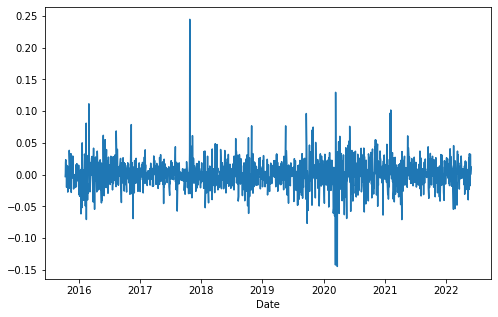

In [11]:
df["log_return"].plot(figsize=(8,5))

<AxesSubplot:xlabel='Date'>

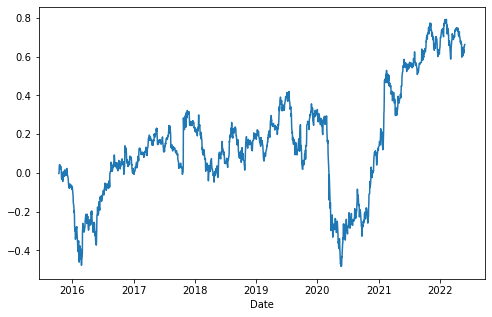

In [12]:
df["log_return"].cumsum().plot(figsize=(8,5))

In [13]:
log_return=df["log_return"].mean()
log_return_a=round(log_return*250*100,3)
log_return_a

10.108

<AxesSubplot:xlabel='Date'>

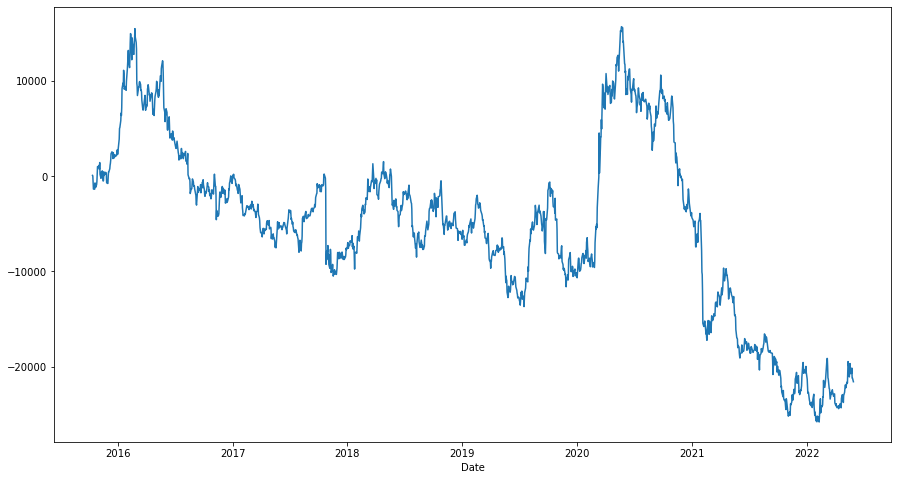

In [14]:
((df["log_return"]/df["log_return"].iloc[1])*100).cumsum().plot(figsize=(15,8))

In [15]:
df["log_return"]

Date
2015-10-12         NaN
2015-10-13   -0.003072
2015-10-14    0.001844
2015-10-15    0.019060
2015-10-16    0.023423
                ...   
2022-05-24    0.002492
2022-05-25   -0.017356
2022-05-26    0.032072
2022-05-27    0.000107
2022-05-30    0.011976
Name: log_return, Length: 1641, dtype: float64

In [66]:
stock_list=["SBIN","TCS","HINDUNILVR","TATASTEEL"]

In [67]:
Portfolio=pd.DataFrame()

for item in stock_list:
    print(item)
    Portfolio[item]=get_history(symbol=item,start=date(2021,6,10),end=date(2022,6,10))["Close"]

SBIN
TCS
HINDUNILVR
TATASTEEL


In [68]:
Portfolio

,SBIN,TCS,HINDUNILVR,TATASTEEL
Date,,,,
2021-06-10,432.25,3216.80,2378.80,1114.45
2021-06-11,429.60,3273.80,2366.50,1158.35
2021-06-14,430.35,3276.35,2364.60,1164.80
2021-06-15,429.50,3262.75,2391.95,1174.30
2021-06-16,425.95,3274.35,2407.90,1142.15
...,...,...,...,...
2022-06-06,463.70,3430.95,2280.50,1078.10
2022-06-07,463.40,3362.70,2211.60,1068.50
2022-06-08,471.30,3404.15,2197.05,1086.75


In [69]:
Portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2021-06-10 to 2022-06-10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SBIN        250 non-null    float64
 1   TCS         250 non-null    float64
 2   HINDUNILVR  250 non-null    float64
 3   TATASTEEL   250 non-null    float64
dtypes: float64(4)
memory usage: 9.8+ KB


In [70]:
Portfolio.describe()

,SBIN,TCS,HINDUNILVR,TATASTEEL
count,250.000000,250.00000,250.000000,250.000000
mean,471.438000,3568.40100,2365.581200,1243.820600
std,35.060321,209.42413,197.907972,115.310671
min,406.700000,3167.45000,1943.950000,999.100000
25%,437.787500,3412.72500,2260.750000,1157.225000
50%,470.100000,3579.70000,2351.150000,1246.075000
75%,501.162500,3735.62500,2445.350000,1325.462500
max,540.550000,4019.15000,2812.450000,1519.400000


In [71]:
Portfolio_normalization=(Portfolio/Portfolio.iloc[0])*100

In [74]:
Portfolio_normalization

,SBIN,TCS,HINDUNILVR,TATASTEEL
Date,,,,
2021-06-10,100.000000,100.000000,100.000000,100.000000
2021-06-11,99.386929,101.771947,99.482933,103.939163
2021-06-14,99.560440,101.851219,99.403060,104.517924
2021-06-15,99.363794,101.428438,100.552800,105.370362
2021-06-16,98.542510,101.789045,101.223306,102.485531
...,...,...,...,...
2022-06-06,107.275882,106.657237,95.867664,96.738301
2022-06-07,107.206478,104.535563,92.971246,95.876890
2022-06-08,109.034124,105.824111,92.359593,97.514469


In [75]:
Portfolio_normalization.describe()

,SBIN,TCS,HINDUNILVR,TATASTEEL
count,250.000000,250.000000,250.000000,250.000000
mean,109.066050,110.930148,99.444308,111.608471
std,8.111121,6.510325,8.319656,10.346868
min,94.089069,98.465867,81.719775,89.649603
25%,101.281087,106.090680,95.037414,103.838216
50%,108.756507,111.281398,98.837649,111.810759
75%,115.942741,116.128606,102.797629,118.934228
max,125.054945,124.942489,118.229780,136.336309


In [79]:
Portfolio_normalization.iloc[0]

SBIN          100.0
TCS           100.0
HINDUNILVR    100.0
TATASTEEL     100.0
Name: 2021-06-10, dtype: float64

<AxesSubplot:xlabel='Date'>

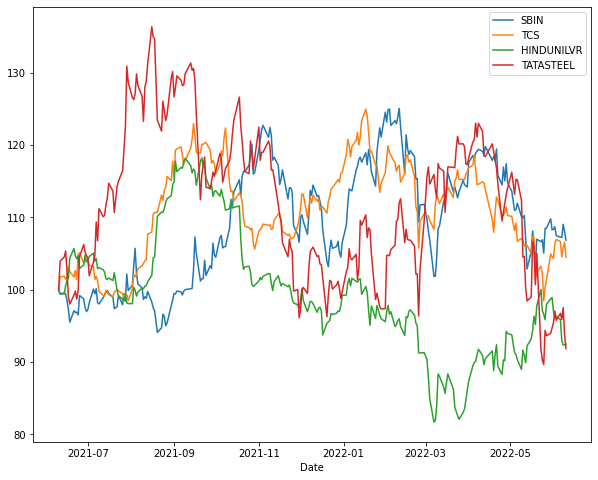

In [78]:
Portfolio_normalization.plot(figsize=(10,8))

In [82]:
return_stocks=(Portfolio/Portfolio.shift(1))-1

In [83]:
return_stocks

,SBIN,TCS,HINDUNILVR,TATASTEEL
Date,,,,
2021-06-10,NaN,NaN,NaN,NaN
2021-06-11,-0.006131,0.017719,-0.005171,0.039392
2021-06-14,0.001746,0.000779,-0.000803,0.005568
2021-06-15,-0.001975,-0.004151,0.011566,0.008156
2021-06-16,-0.008265,0.003555,0.006668,-0.027378
...,...,...,...,...
2022-06-06,-0.001722,-0.002674,-0.004996,0.010119
2022-06-07,-0.000647,-0.019892,-0.030213,-0.008905
2022-06-08,0.017048,0.012326,-0.006579,0.017080


In [84]:
anual_return=return_stocks.mean()*250

In [85]:
anual_return

SBIN          0.104773
TCS           0.068259
HINDUNILVR   -0.053064
TATASTEEL     0.002287
dtype: float64

In [86]:
weight=np.array([.25,.25,.25,.25])

In [88]:
portfolio_return=round(np.dot(anual_return,weight)*100,2)

In [89]:
portfolio_return

3.06

In [90]:
weight2=np.array([.25,.5,.125,.125])

In [91]:
portfolio_return_weight2=round(np.dot(anual_return,weight2)*100,2)
portfolio_return_weight2

5.4